# Proyecto 4 - Visión por Computadora
## Integrantes:

- Javier Alvarado - 21188
- Mario Guerra - 21008
- Emilio Solano - 21212

In [ ]:
# Instalación de dependencias
%pip install tensorflow scikit-learn matplotlib seaborn opencv-python

  Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached absl_py-2.2.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached numpy-2.1.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached ml_dtypes-0.5.1-cp312-cp312-win_amd64.whl.metadata (22 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached pandas-2.

In [ ]:
%pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Usuario\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("agungpambudi/mnist-multiple-dataset-comprehensive-analysis")

print("Path to dataset files:", path)

100%|██████████| 874M/874M [00:40<00:00, 22.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/agungpambudi/mnist-multiple-dataset-comprehensive-analysis/versions/3


In [2]:
import shutil

shutil.copytree(path, "/content/mnist-multi", dirs_exist_ok=True)


'/content/mnist-multi'

# Reconocimiento de dígitos escritos a mano usando una CNN

Epoch 1/20


c:\Users\mague\Downloads\handwrittenDigitsRecognitionCV\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 130s 68ms/step - accuracy: 0.8950 - loss: 0.3477 - val_accuracy: 0.9861 - val_loss: 0.0381
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 160s 85ms/step - accuracy: 0.9774 - loss: 0.0753 - val_accuracy: 0.9911 - val_loss: 0.0294
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 113s 60ms/step - accuracy: 0.9839 - loss: 0.0566 - val_accuracy: 0.9910 - val_loss: 0.0257
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9854 - loss: 0.0479 - val_accuracy: 0.9927 - val_loss: 0.0216
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9870 - loss: 0.0402 - val_accuracy: 0.9926 - val_loss: 0.0221
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9887 - loss: 0.0340 - val_accuracy: 0.9937 - val_loss: 0.0217
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 30ms/step - accuracy: 0.9901 - loss: 0.0319 - val_accuracy: 0.9938 - val_loss: 0.0194
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9911 - loss: 0

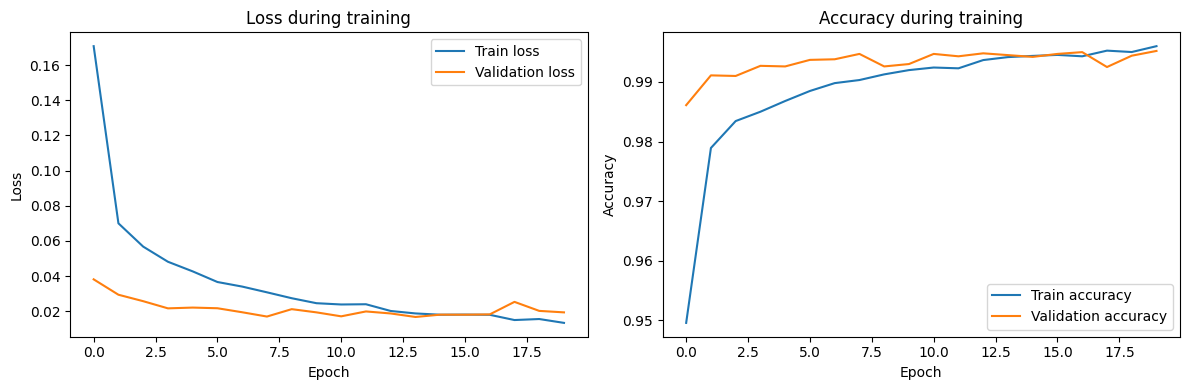

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Cargar y preparar los datos MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)  # (28,28,1)
x_test = np.expand_dims(x_test, -1)

# Construcción de la CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compilación
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

# Guardar el modelo
model.save("cnn_model.h5")

# Realizar gráficas de pérdida y validación
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss during training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Graficar precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy during training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


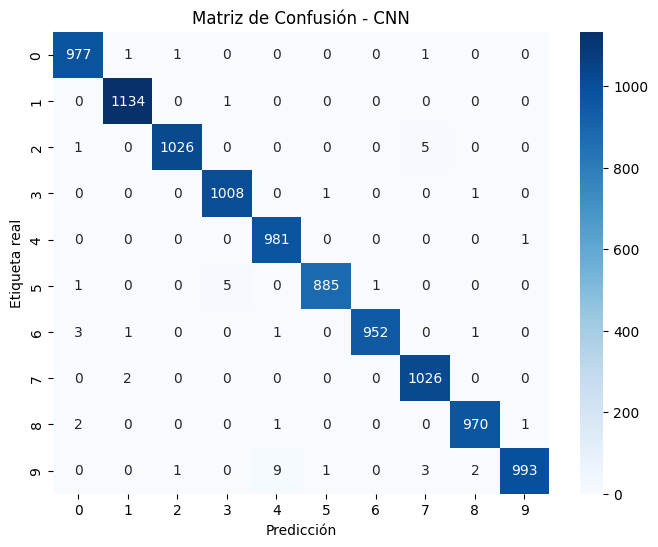

Clasification Report: 
              precision    recall  f1-score   support

           0     0.9929    0.9969    0.9949       980
           1     0.9965    0.9991    0.9978      1135
           2     0.9981    0.9942    0.9961      1032
           3     0.9941    0.9980    0.9960      1010
           4     0.9889    0.9990    0.9939       982
           5     0.9977    0.9922    0.9949       892
           6     0.9990    0.9937    0.9963       958
           7     0.9913    0.9981    0.9947      1028
           8     0.9959    0.9959    0.9959       974
           9     0.9980    0.9841    0.9910      1009

    accuracy                         0.9952     10000
   macro avg     0.9952    0.9951    0.9952     10000
weighted avg     0.9952    0.9952    0.9952     10000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Cargar modelo guardado
model = tf.keras.models.load_model("cnn_model.h5")

# Preparar datos de prueba
(_, _), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_test = x_test.astype("float32") / 255.0
x_test = np.expand_dims(x_test, -1)

# Obtener predicciones
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - CNN")
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.show()

# Reporte de métricas
print("Clasification Report: ")
print(classification_report(y_test, y_pred, digits=4))

In [ ]:
import os
import random
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

def predict_images(model_path="cnn_model.h5", folder="input/", num_images=20):
    model = tf.keras.models.load_model(model_path)

    # Filtrar archivos de imagen
    images = [f for f in os.listdir(folder) if f.lower().endswith((".png", ".jpg", ".jpeg"))]
    selected_images = random.sample(images, min(num_images, len(images)))

    for file in selected_images:
        if file.lower().endswith((".png", ".jpg", ".jpeg")):
            ruta = os.path.join(folder, file)
            img = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)

            if img is None:
                print(f"No se pudo cargar {file}")
                continue

            # Invertir si el fondo es blanco
            if np.mean(img) > 127:
                img = cv2.bitwise_not(img)

            # Redimensionar a 28x28
            img = cv2.resize(img, (28, 28))

            # Normalizar y expandir dimensiones
            img = img.astype("float32") / 255.0
            img = np.expand_dims(img, axis=-1)
            img = np.expand_dims(img, axis=0)

            pred = model.predict(img)
            clase = np.argmax(pred)

            # Mostrar resultado
            plt.imshow(img[0].reshape(28, 28), cmap="gray")
            plt.title(f"{file} → Predicción: {clase}")
            plt.axis('off')
            plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


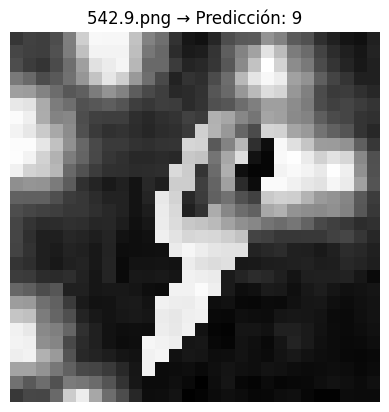

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


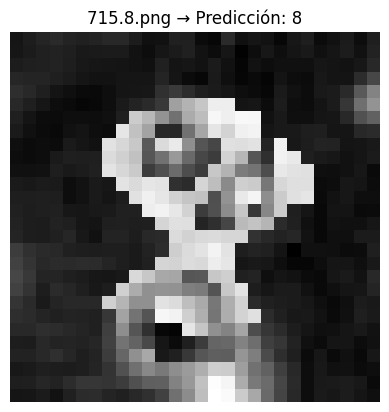

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


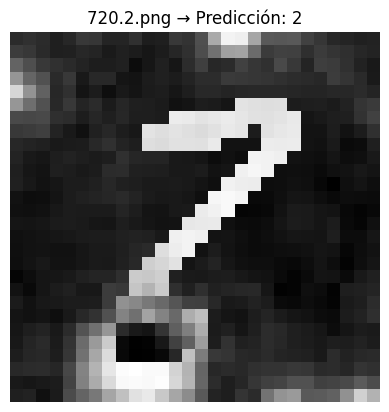

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


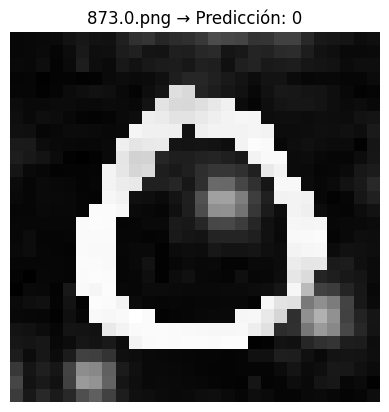

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


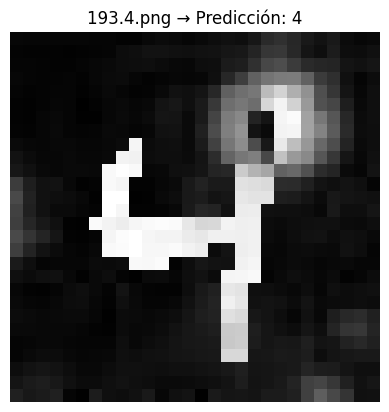

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


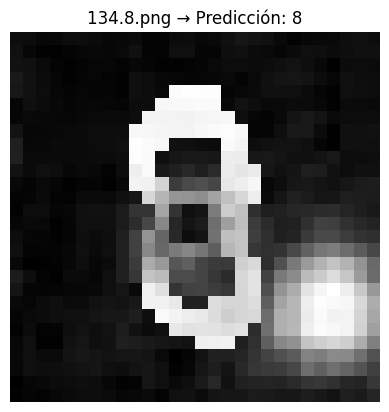

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


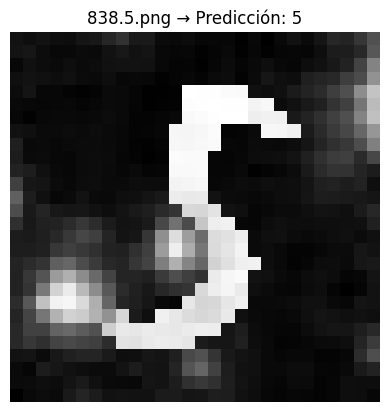

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


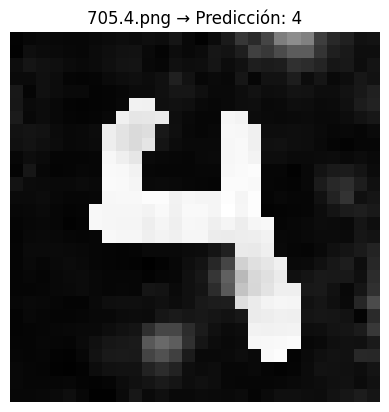

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


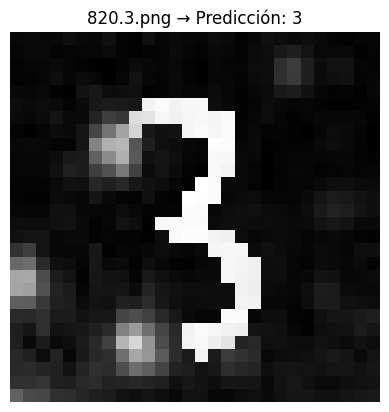

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


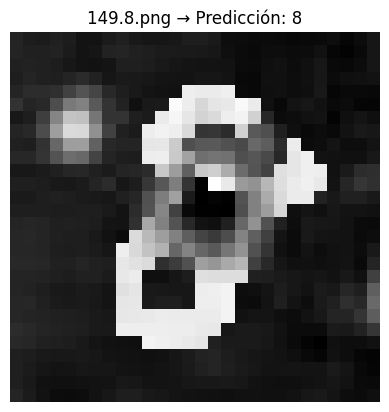

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


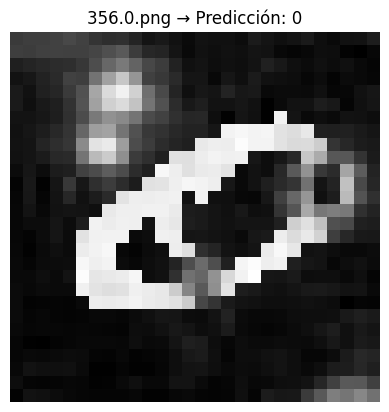

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


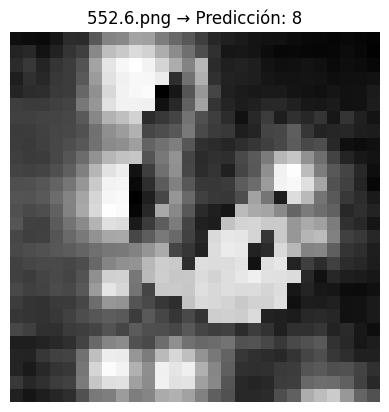

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


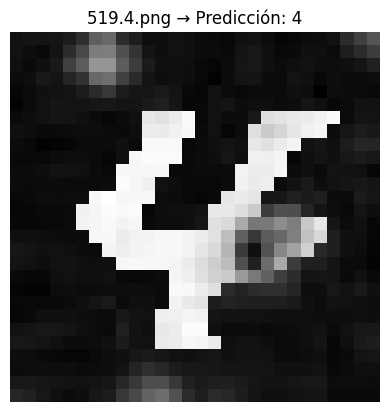

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


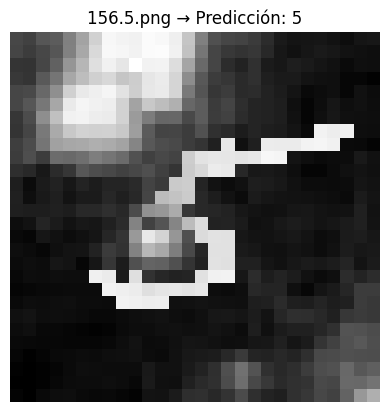

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


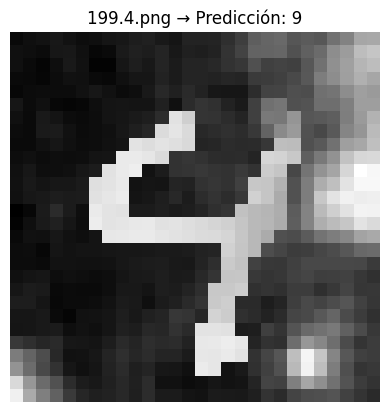

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


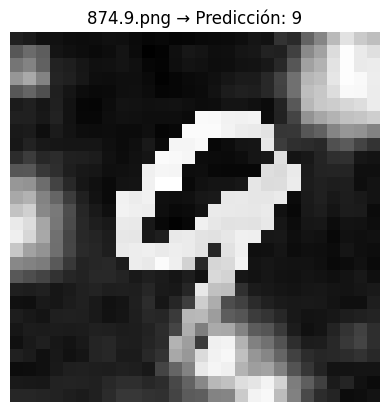

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


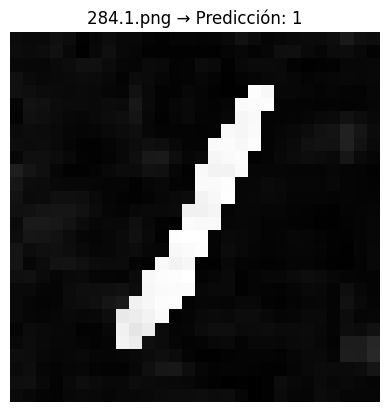

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


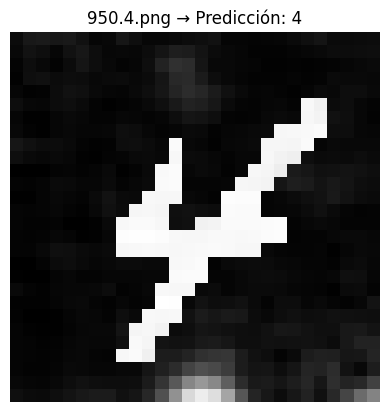

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


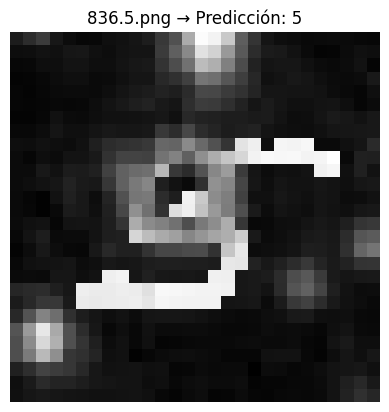

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


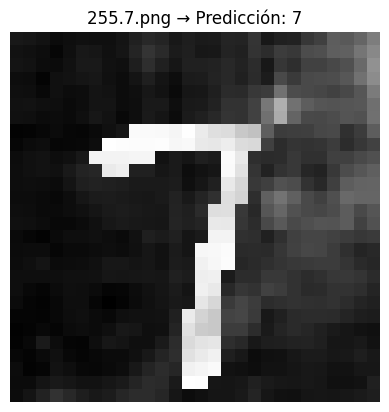

In [ ]:
predict_images("cnn_model.h5", folder="PolyMNIST/MMNIST/test/m3", num_images=20)

# Reconocimiento de dígitos escritos a mano usando Vision Transformer (ViT)

In [ ]:
import tensorflow as tf
print(tf.__version__)
print("GPU disponible:", tf.config.list_physical_devices('GPU'))


2.18.0
GPU disponible: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 1) Cargar y preprocesar MNIST
# -------------------------------------------------------------------
# Cargo MNIST directamente desde Keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)
x_test  = np.expand_dims(x_test,  -1)

# Parámetros de parches y embeddings
patch_size   = 7         # cada parche será de 7×7 píxeles
num_patches  = (28 // patch_size) ** 2  # 16 parches
projection_dim = 64      # dimensión del embedding de cada parche
num_heads     = 4        # nº de "cabezas" en el multi-head attention
transformer_units = [projection_dim * 2, projection_dim]  # MLP dentro de cada bloque
transformer_layers = 6   # nº de bloques Transformer a encadenar
dropout_rate = 0.1       # algo de dropout
image_size   = 28        # tamaño de la imagen (MNIST: 28×28)
num_classes  = 10        # 10 dígitos (0–9)


# 2) Definir capa de extracción de parches (PatchExtractor)
# -------------------------------------------------------------------
from tensorflow.keras.saving import register_keras_serializable

@register_keras_serializable()
class PatchExtractor(tf.keras.layers.Layer):
    def __init__(self, patch_size, **kwargs):
        super().__init__(**kwargs)
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

    def get_config(self):
        config = super().get_config()
        config.update({"patch_size": self.patch_size})
        return config



# 3) Definir capa de Embedding de parches + token [CLS] + posición
# -------------------------------------------------------------------
@register_keras_serializable()
class PatchEncoder(tf.keras.layers.Layer):
    def __init__(self, num_patches, projection_dim, **kwargs):
        super().__init__(**kwargs)
        self.num_patches = num_patches
        self.projection_dim = projection_dim
        self.projection = tf.keras.layers.Dense(units=projection_dim)
        self.cls_token = self.add_weight(
            shape=(1, 1, projection_dim),
            initializer="random_normal",
            trainable=True,
            name="cls_token",
        )
        self.position_embedding = tf.keras.layers.Embedding(
            input_dim=num_patches + 1,
            output_dim=projection_dim,
        )

    def call(self, patchs):
        batch_size = tf.shape(patchs)[0]
        projected = self.projection(patchs)
        cls_tokens = tf.broadcast_to(self.cls_token, [batch_size, 1, self.projection_dim])
        x = tf.concat([cls_tokens, projected], axis=1)
        positions = tf.range(start=0, limit=self.num_patches + 1, delta=1)
        pos_embed = self.position_embedding(positions)
        return x + pos_embed

    def get_config(self):
        config = super().get_config()
        config.update({
            "num_patches": self.num_patches,
            "projection_dim": self.projection_dim,
        })
        return config



# 4) Bloque Transformer (MultiHeadSelfAttention + MLP interno)
# -------------------------------------------------------------------
def transformer_block(inputs, num_heads, projection_dim, transformer_units, dropout_rate):
    # Layer Normalization + Multi-Head Self-Attention + Dropout + Skip connection
    x1 = layers.LayerNormalization(epsilon=1e-6)(inputs)
    attention_output = layers.MultiHeadAttention(
        num_heads=num_heads, key_dim=projection_dim, dropout=dropout_rate
    )(x1, x1)
    x2 = layers.Add()([attention_output, inputs])  # skip connection

    # MLP interno: LayerNorm + Dense → GELU → Dense → Dropout → Skip con x2
    x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
    for units in transformer_units:
        x3 = layers.Dense(units, activation="gelu")(x3)
    x3 = layers.Dropout(dropout_rate)(x3)
    x4 = layers.Add()([x3, x2])  # skip connection

    return x4


# 5) Construir el modelo completo (Vision Transformer)
# -------------------------------------------------------------------
def build_vit_classifier():
    inputs = layers.Input(shape=(image_size, image_size, 1))  # (28,28,1)

    # 5.1) Extraer parches
    patches = PatchExtractor(patch_size)(inputs)

    # 5.2) Embedding + token CLS + posición
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # 5.3) Varias capas Transformer en secuencia
    x = encoded_patches
    for _ in range(transformer_layers):
        x = transformer_block(x, num_heads, projection_dim, transformer_units, dropout_rate)

    # 5.4) Tomamos la salida de la posición 0 → token [CLS]
    representation = layers.LayerNormalization(epsilon=1e-6)(x)
    cls_token_final = representation[:, 0, :]  # forma = (batch_size, projection_dim)

    # 5.5) Clasificación final: Dense → softmax sobre 10 clases
    logits = layers.Dense(num_classes, activation="softmax")(cls_token_final)

    # 5.6) Creamos el modelo Keras
    model = keras.Model(inputs=inputs, outputs=logits)
    return model


# Instanciamos y compilamos el ViT
vit_model = build_vit_classifier()
optimizer = keras.optimizers.Adam(learning_rate=1e-3)
vit_model.compile(
    optimizer=optimizer,
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"],
)

vit_model.summary()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patch_extractor     │ (None, None, 49)  │          0 │ input_layer[0][0] │
│ (PatchExtractor)    │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patch_encoder       │ (None, 17, 64)    │      4,352 │ patch_extractor[… │
│ (PatchEncoder)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 17, 64)    │        128 │ patch_encoder[0]… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 17, 64)    │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 17, 64)    │          0 │ multi_head_atten… │
│                     │                   │            │ patch_encoder[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 17, 64)    │        128 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 17, 128)   │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 17, 64)    │      8,256 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 17, 64)    │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 17, 64)    │          0 │ dropout_1[0][0],  │
│                     │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 17, 64)    │        128 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 17, 64)    │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 17, 64)    │          0 │ multi_head_atten… │
│                     │                   │            │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 17, 64)    │        128 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 17, 128)   │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 17, 64)    │      8,256 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 17, 64)    │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 17, 64)    │          0 │ dropout_3[0][0],

 Total params: 504,330 (1.92 MB)

 Trainable params: 504,330 (1.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 6) Entrenar el ViT sobre MNIST
# -------------------------------------------------------------------
# Ajusta batch_size y epochs según tu GPU. En Colab con GPU T4, batch_size=128 o 256 va bien.
batch_size = 128
epochs     = 25

history = vit_model.fit(
    x=x_train, y=y_train,
    validation_data=(x_test, y_test),
    batch_size=batch_size,
    epochs=epochs,
)


Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 52ms/step - accuracy: 0.6539 - loss: 1.0170 - val_accuracy: 0.9457 - val_loss: 0.1791
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9409 - loss: 0.1898 - val_accuracy: 0.9646 - val_loss: 0.1125
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9610 - loss: 0.1254 - val_accuracy: 0.9744 - val_loss: 0.0811
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9697 - loss: 0.0987 - val_accuracy: 0.9718 - val_loss: 0.0980
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9748 - loss: 0.0792 - val_accuracy: 0.9751 - val_loss: 0.0819
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9751 - loss: 0.0793 - val_accuracy: 0.9758 - val_loss: 0.0733
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9781 - loss: 0.0696 - val_accuracy: 0.9805 - val_loss: 0.0670
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9792 - loss: 0.0644 - val_acc

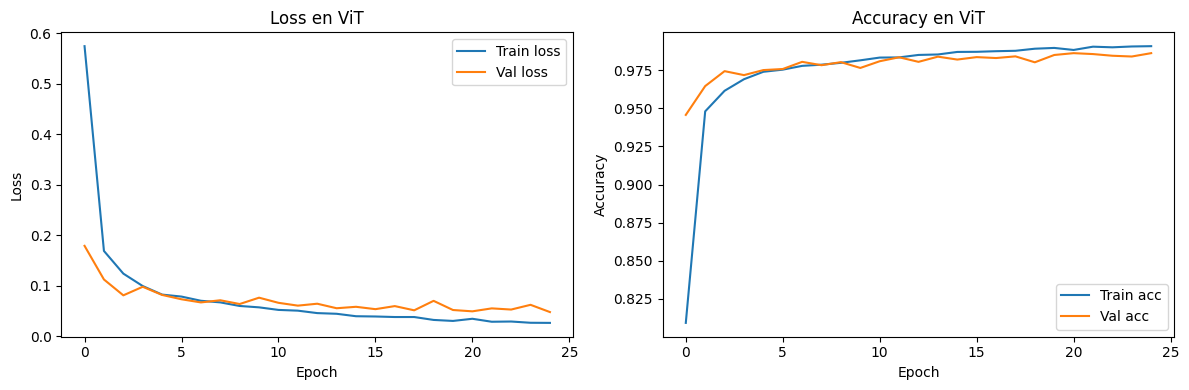

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.title('Loss en ViT')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.title('Accuracy en ViT')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step


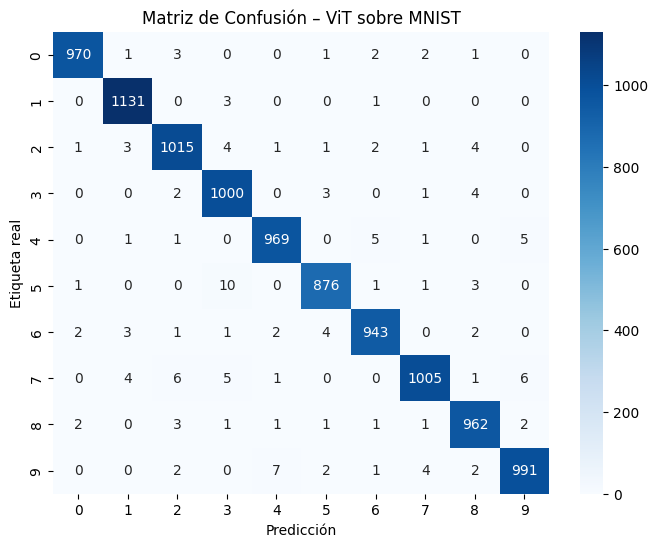

Classification Report (digits [0–9]):
              precision    recall  f1-score   support

           0     0.9939    0.9898    0.9918       980
           1     0.9895    0.9965    0.9930      1135
           2     0.9826    0.9835    0.9831      1032
           3     0.9766    0.9901    0.9833      1010
           4     0.9878    0.9868    0.9873       982
           5     0.9865    0.9821    0.9843       892
           6     0.9864    0.9843    0.9854       958
           7     0.9892    0.9776    0.9834      1028
           8     0.9826    0.9877    0.9852       974
           9     0.9871    0.9822    0.9846      1009

    accuracy                         0.9862     10000
   macro avg     0.9862    0.9861    0.9861     10000
weighted avg     0.9862    0.9862    0.9862     10000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# 1) Obtener predicciones en todo el set de prueba
y_pred_probs = vit_model.predict(x_test)          # shape = (10000, 10)
y_pred       = np.argmax(y_pred_probs, axis=1)    # shape = (10000,)

# 2) Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión – ViT sobre MNIST")
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.show()

# 3) Reporte de clasificación
print("Classification Report (digits [0–9]):")
print(classification_report(y_test, y_pred, digits=4))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


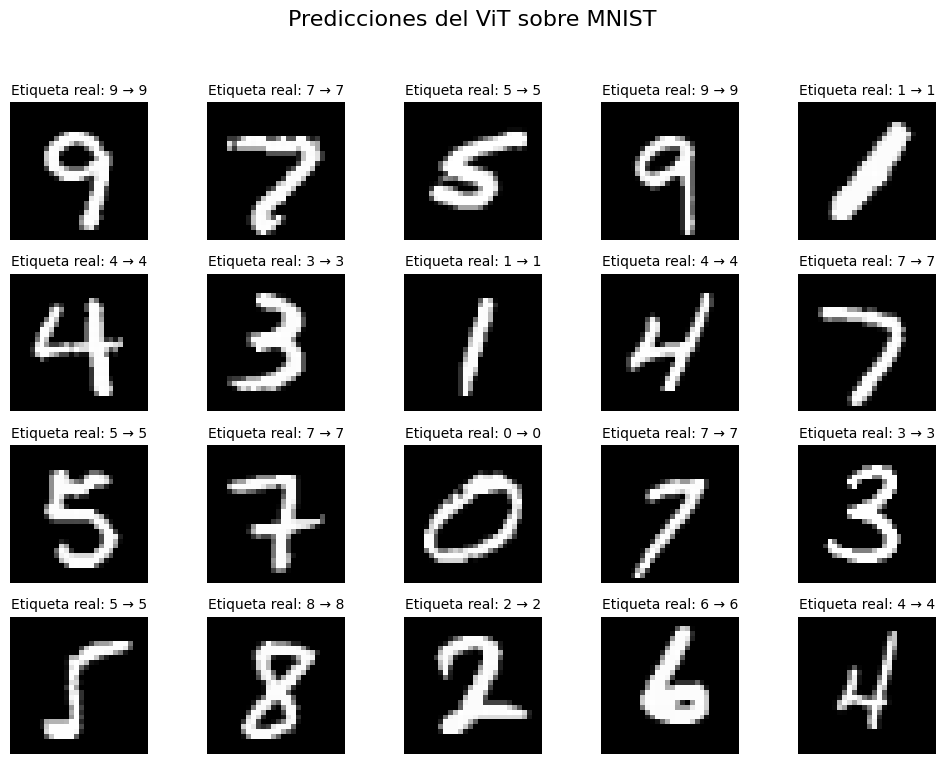

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# -------------------------------------------------------------------
# Suponemos que ya tienes:
#   vit_model  → tu Vision Transformer entrenado sobre MNIST
#   x_test, y_test → datos de prueba de MNIST (normalizados en [0,1], shape (n,28,28,1))
# -------------------------------------------------------------------

def mostrar_predicciones_vit(model, x_test, y_test, n_filas=4, n_cols=5):
    """
    Toma el modelo ViT y un conjunto de prueba, elige n_filas*n_cols imágenes
    al azar y las muestra en un grid, indicando en cada plot:
       (Real → Predicho).
    """
    n_muestras = n_filas * n_cols
    indices = random.sample(range(len(x_test)), n_muestras)

    fig, axes = plt.subplots(n_filas, n_cols, figsize=(n_cols*2, n_filas*2))
    fig.suptitle("Predicciones del ViT sobre MNIST", fontsize=16)

    # Para cada subplot, predice y dibuja la imagen
    for i, idx in enumerate(indices):
        fila = i // n_cols
        col  = i %  n_cols

        img = x_test[idx]            # shape (28,28,1), float32 en [0,1]
        etiqueta_real = int(y_test[idx])

        # El modelo espera entrada shape (1,28,28,1)
        img_input = img[np.newaxis, ...]  # (1,28,28,1)
        probs = model.predict(img_input)   # shape (1,10)
        etiqueta_pred = int(np.argmax(probs, axis=1)[0])

        ax = axes[fila, col]
        # Mostrar la imagen en escala de grises
        ax.imshow(img.squeeze(), cmap="gray")
        ax.set_title(f"Etiqueta real: {etiqueta_real} → {etiqueta_pred}", fontsize=10)
        ax.axis("off")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


# Llamada de ejemplo: muestra 20 imágenes (4×5)
mostrar_predicciones_vit(vit_model, x_test, y_test, n_filas=4, n_cols=5)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:393: UserWarning: `build()` was called on layer 'patch_encoder', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


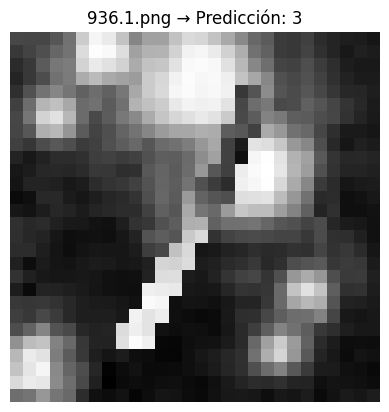

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


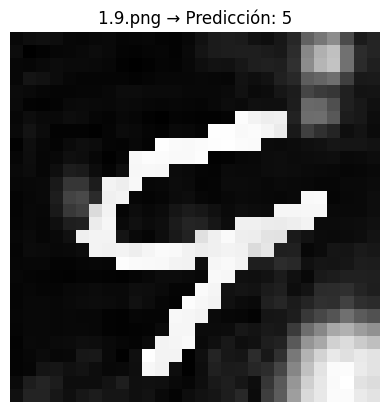

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


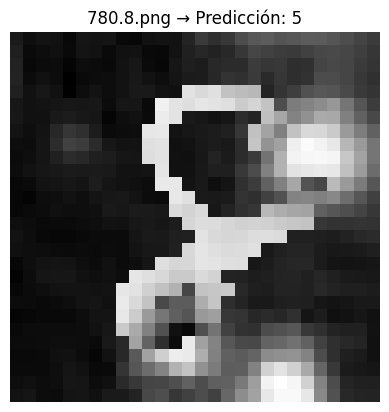

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


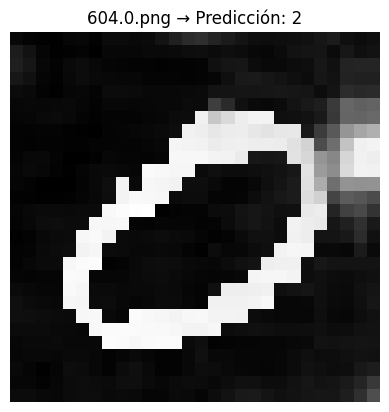

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


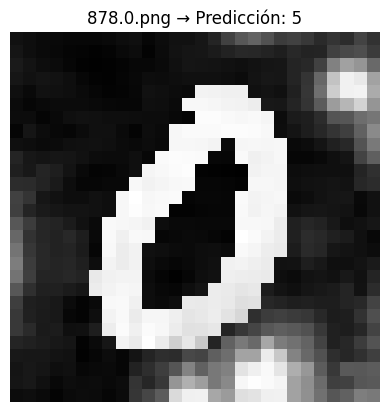

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


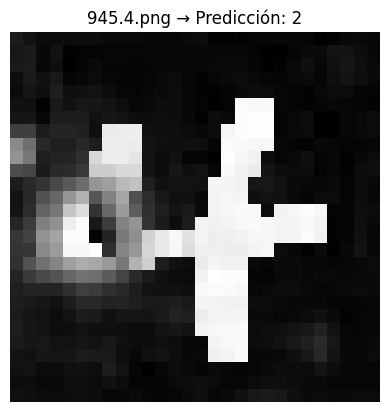

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


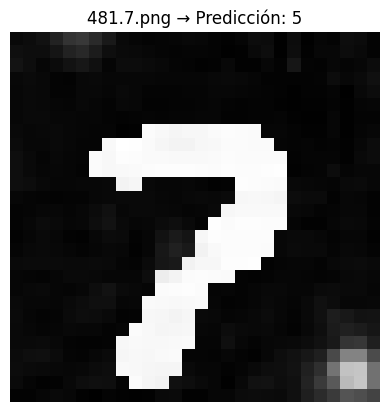

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


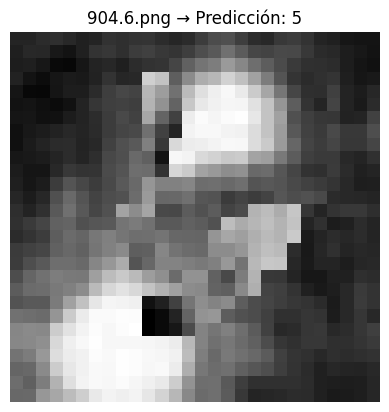

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


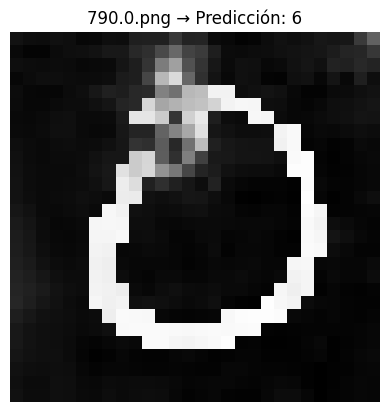

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


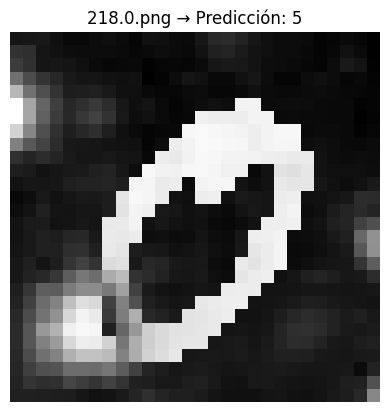

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


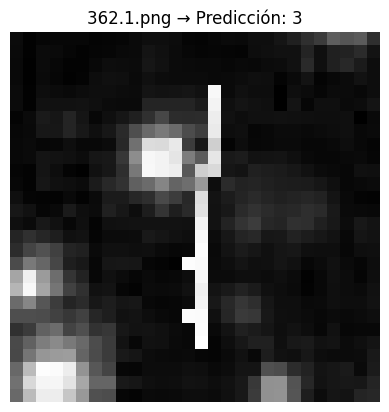

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


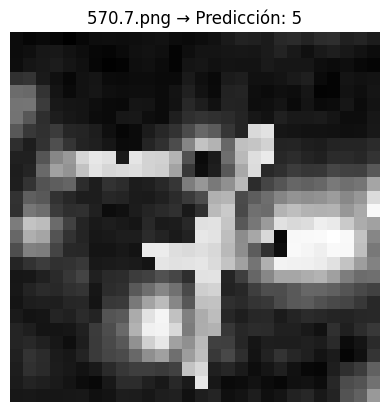

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


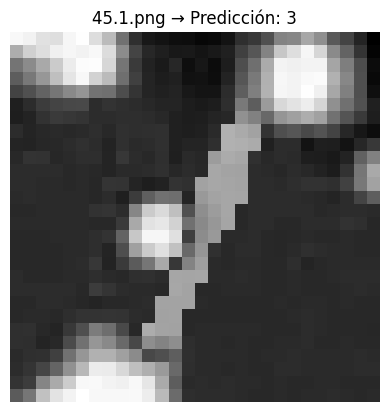

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


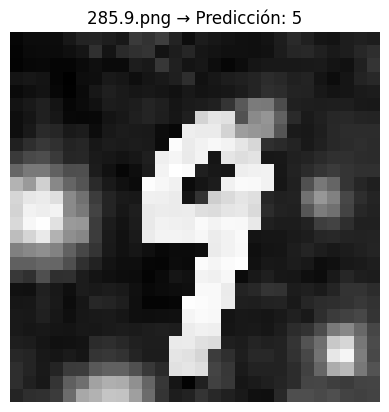

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


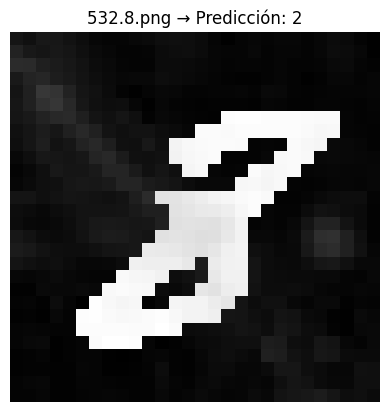

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


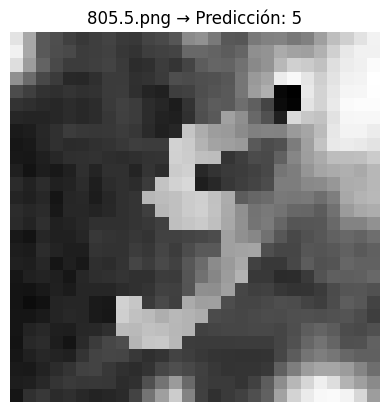

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


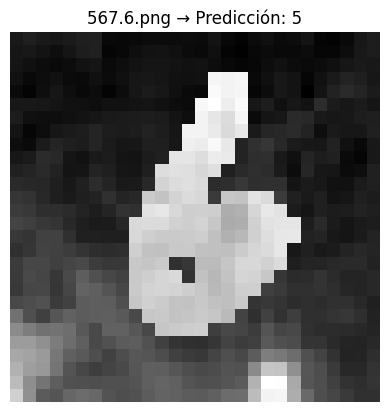

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


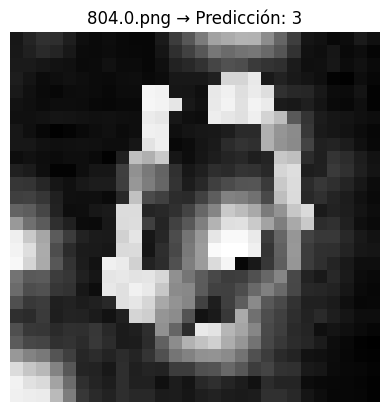

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


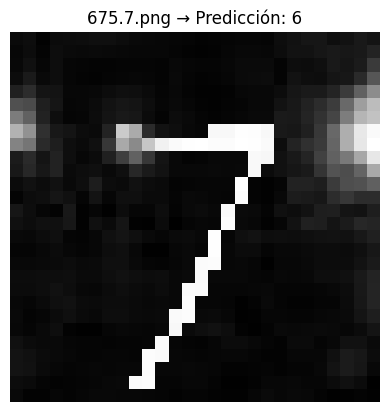

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


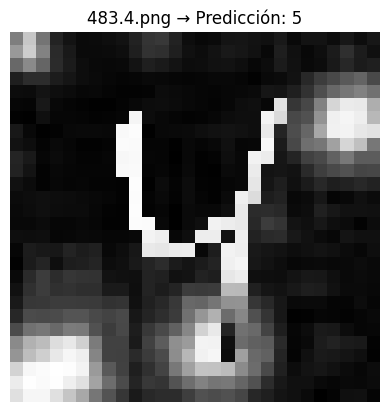

In [5]:
import os
import random
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

def predict_images_vit(model_path="vit_model.h5", folder="input/", num_images=20):
    # Cargar modelo ViT previamente entrenado
    model = tf.keras.models.load_model(model_path, compile=False)

    # Buscar imágenes válidas en la carpeta
    images = [f for f in os.listdir(folder) if f.lower().endswith((".png", ".jpg", ".jpeg"))]
    selected_images = random.sample(images, min(num_images, len(images)))

    for file in selected_images:
        ruta = os.path.join(folder, file)
        img = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)

        if img is None:
            print(f"No se pudo cargar {file}")
            continue

        # Invertir colores si el fondo es claro
        if np.mean(img) > 127:
            img = cv2.bitwise_not(img)

        # Redimensionar a 28x28 píxeles
        img = cv2.resize(img, (28, 28))

        # Normalizar y adaptar dimensiones para ViT
        img = img.astype("float32") / 255.0
        img = np.expand_dims(img, axis=-1)  # (28, 28, 1)
        img = np.expand_dims(img, axis=0)   # (1, 28, 28, 1)

        # Realizar predicción
        pred = model.predict(img)
        clase = np.argmax(pred)

        # Mostrar la imagen con la predicción
        plt.imshow(img[0].reshape(28, 28), cmap="gray")
        plt.title(f"{file} → Predicción: {clase}")
        plt.axis('off')
        plt.show()

# Ejemplo de uso:
predict_images_vit("vit_saved_model.keras",  folder="mnist-multi/PolyMNIST/MMNIST/test/m3", num_images=20)


In [4]:
vit_model.save("vit_saved_model.keras")

# Reconocimiento de dígitos escritos a mano usando una MLP

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 0.8695 - loss: 0.4217 - val_accuracy: 0.9638 - val_loss: 0.1229
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9467 - loss: 0.1706 - val_accuracy: 0.9712 - val_loss: 0.0860
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9586 - loss: 0.1351 - val_accuracy: 0.9769 - val_loss: 0.0779
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9650 - loss: 0.1111 - val_accuracy: 0.9738 - val_loss: 0.0809
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9686 - loss: 0.0976 - val_accuracy: 0.9762 - val_loss: 0.0753
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9711 - loss: 0.0933 - val_accuracy: 0.9791 - val_loss: 0.0654
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9755 - loss: 0.0805 - val_accuracy: 0.9799 - val_loss: 0.0636
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9780 -

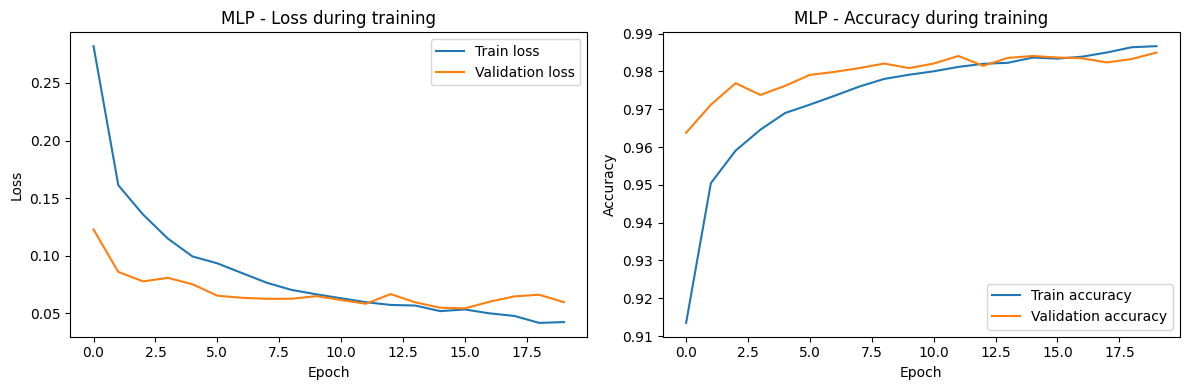

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Cargar y preparar los datos MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Aplanar las imágenes para MLP
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# Construcción del MLP
mlp_model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(784,)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Compilación
mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento
mlp_history = mlp_model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

# Guardar modelo
mlp_model.save("mlp_model.h5")

# Gráficas de pérdida y precisión
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(mlp_history.history['loss'], label='Train loss')
plt.plot(mlp_history.history['val_loss'], label='Validation loss')
plt.title('MLP - Loss during training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(mlp_history.history['accuracy'], label='Train accuracy')
plt.plot(mlp_history.history['val_accuracy'], label='Validation accuracy')
plt.title('MLP - Accuracy during training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Usuario\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


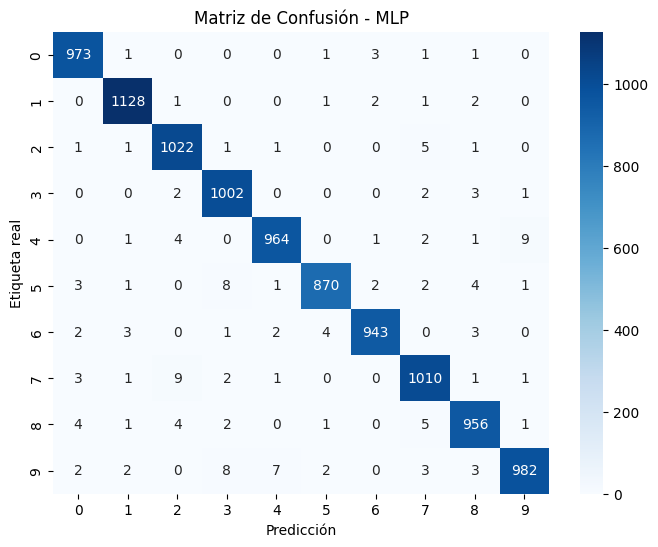

Classification Report - MLP:
              precision    recall  f1-score   support

           0     0.9848    0.9929    0.9888       980
           1     0.9903    0.9938    0.9921      1135
           2     0.9808    0.9903    0.9855      1032
           3     0.9785    0.9921    0.9853      1010
           4     0.9877    0.9817    0.9847       982
           5     0.9898    0.9753    0.9825       892
           6     0.9916    0.9843    0.9880       958
           7     0.9796    0.9825    0.9811      1028
           8     0.9805    0.9815    0.9810       974
           9     0.9869    0.9732    0.9800      1009

    accuracy                         0.9850     10000
   macro avg     0.9851    0.9848    0.9849     10000
weighted avg     0.9850    0.9850    0.9850     10000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar modelo
mlp_model = tf.keras.models.load_model("mlp_model.h5")

# Preparar datos de test
(_, _), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_test = x_test.astype("float32") / 255.0
x_test = x_test.reshape(-1, 28 * 28)

# Predicciones
y_pred_probs = mlp_model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - MLP")
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.show()

# Reporte de clasificación
print("Classification Report - MLP:")
print(classification_report(y_test, y_pred, digits=4))

In [ ]:
import os
import random
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

def predict_images_mlp(model_path="mlp_model.h5", folder="input/", num_images=20):
    # Cargar modelo MLP entrenado
    model = tf.keras.models.load_model(model_path)

    # Filtrar solo imágenes
    images = [f for f in os.listdir(folder) if f.lower().endswith((".png", ".jpg", ".jpeg"))]
    selected_images = random.sample(images, min(num_images, len(images)))

    for file in selected_images:
        ruta = os.path.join(folder, file)
        img = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)

        if img is None:
            print(f"No se pudo cargar {file}")
            continue

        # Invertir si el fondo es blanco
        if np.mean(img) > 127:
            img = cv2.bitwise_not(img)

        # Redimensionar a 28x28
        img = cv2.resize(img, (28, 28))

        # Normalizar y aplanar para el MLP
        img_flat = img.astype("float32") / 255.0
        img_flat = img_flat.reshape(1, 28 * 28)

        # Predicción
        pred = model.predict(img_flat)
        clase = np.argmax(pred)

        # Mostrar imagen
        plt.imshow(img, cmap="gray")
        plt.title(f"{file} → Predicción: {clase}")
        plt.axis('off')
        plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


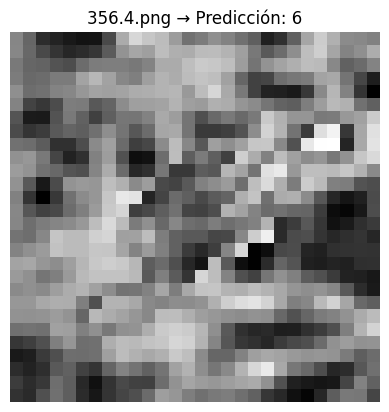

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


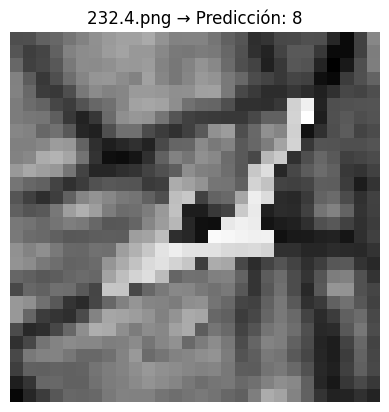

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


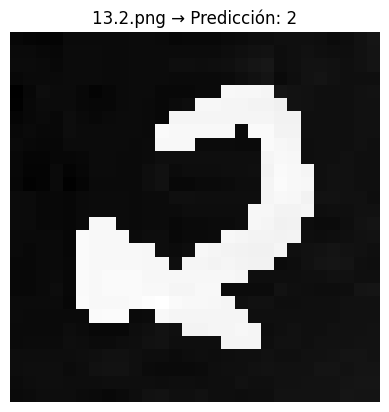

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


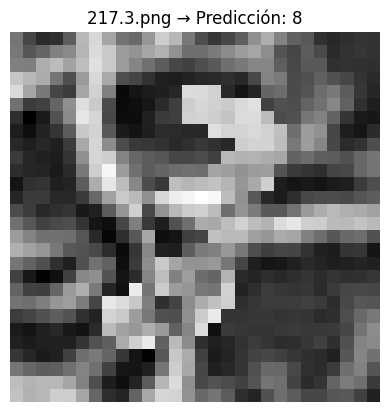

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


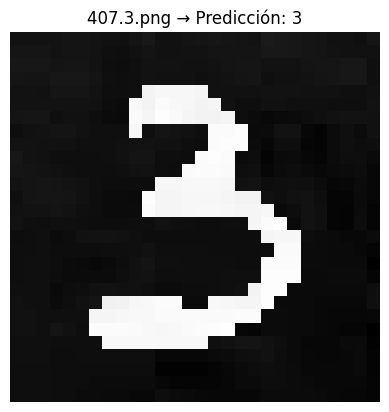

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step


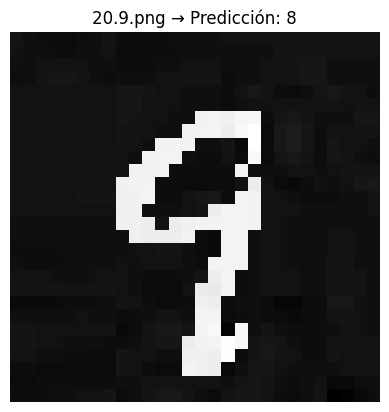

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


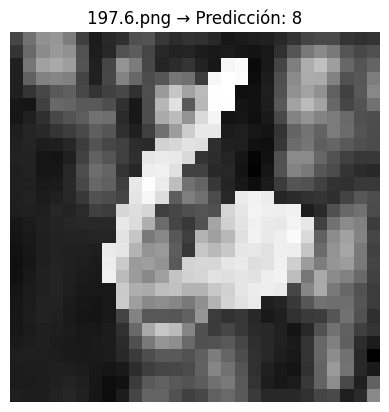

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


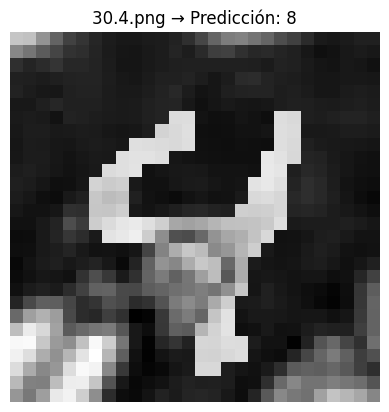

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


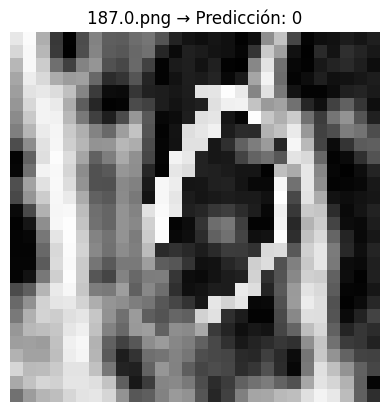

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


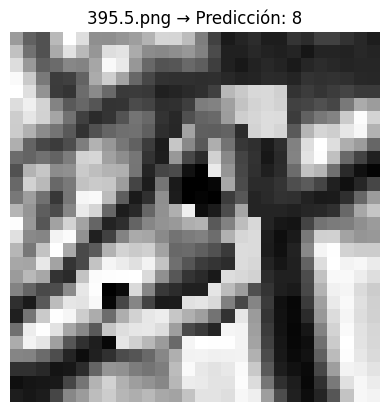

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


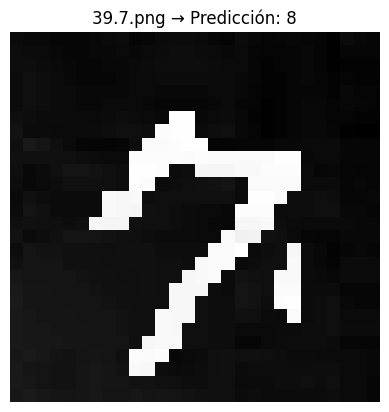

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


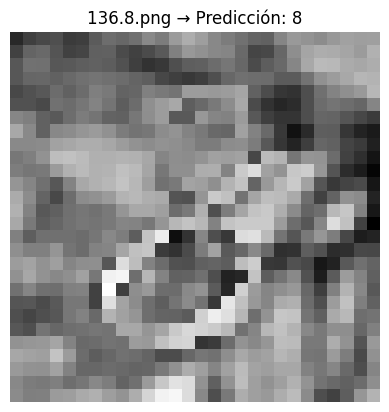

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


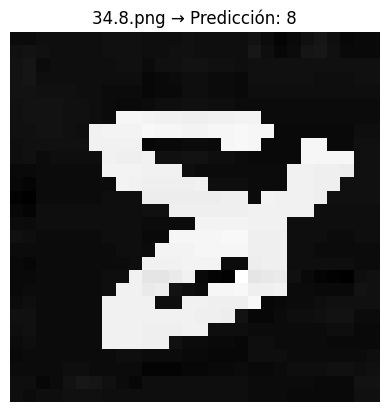

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


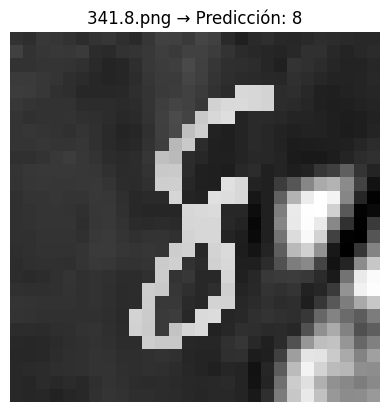

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


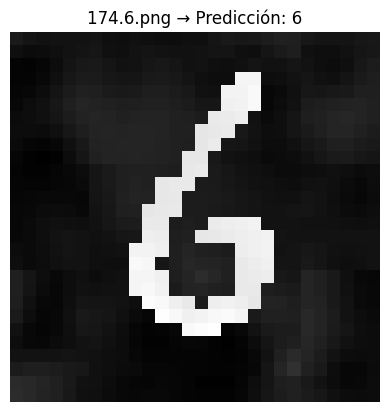

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


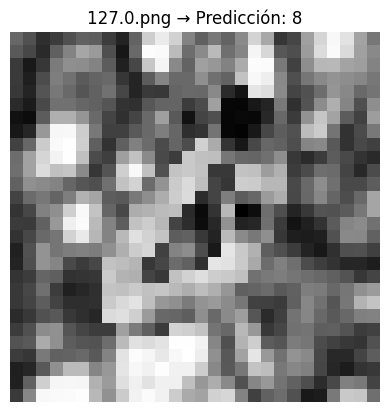

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


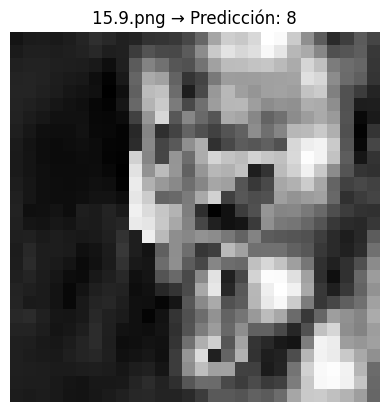

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


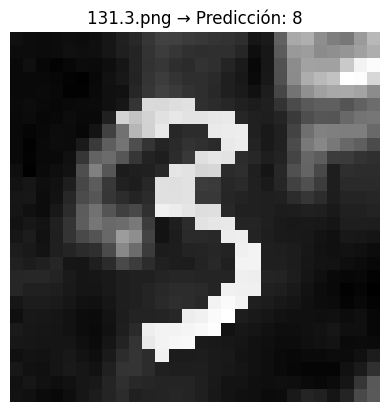

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


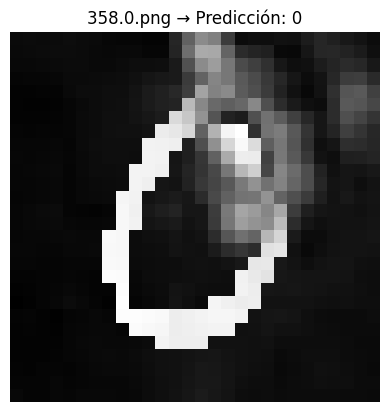

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


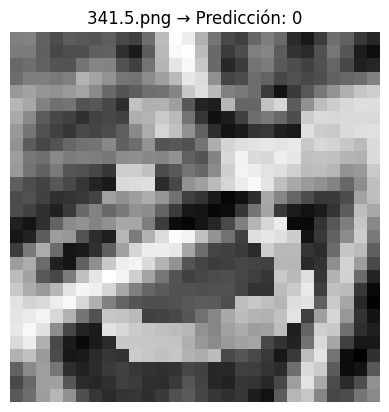

In [ ]:
predict_images_mlp("mlp_model.h5", folder="MMNIST/test/m0", num_images=20)
